# KMeans Clustering

This notebook demonstrates a KMeans algorithm tested on the SPAETH Clustering Dataset.

In [1]:
import sys
import numpy as np
import pandas as pd
from kmeans import KMeansModel, KMeansPlusPlusInitializer
from matplotlib import pyplot as plt
%matplotlib inline

/Users/jeremy/anaconda/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


## Load and transform data
Load the data into a Pandas DataFrame. The SPAETH files contain headers. Each line of which is preceeded with a `#`, so we'll filter out those lines.

In [2]:
def load_spaeth_data(filepath):
    lines = []
    with open(filepath) as f:
        for line in f:
            if '#' not in line:
                lines.append(line.split())
    return lines

lines = load_spaeth_data('../data/spaeth_06.txt')
df = pd.DataFrame(lines, columns=['x', 'y'], dtype=float)
df.head()

,x,y
0,25.0,42.0
1,23.0,40.0
2,25.0,40.0
3,21.0,39.0
4,22.0,37.0


## Build the model
The parameter `k` indicates how many clusters to group the data into

In [9]:
model = KMeansModel()
model.initializer = KMeansPlusPlusInitializer()
model.learn(df, ['x', 'y'], k=4)

[array([ 11.,  25.]), array([ 41.,   3.]), array([ 25.,  42.]), array([ 25.,  42.])]


## Visualize the results
Each cluster is represented in a unique color with a red circle representing the __centroid__.

[]

/Users/jeremy/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


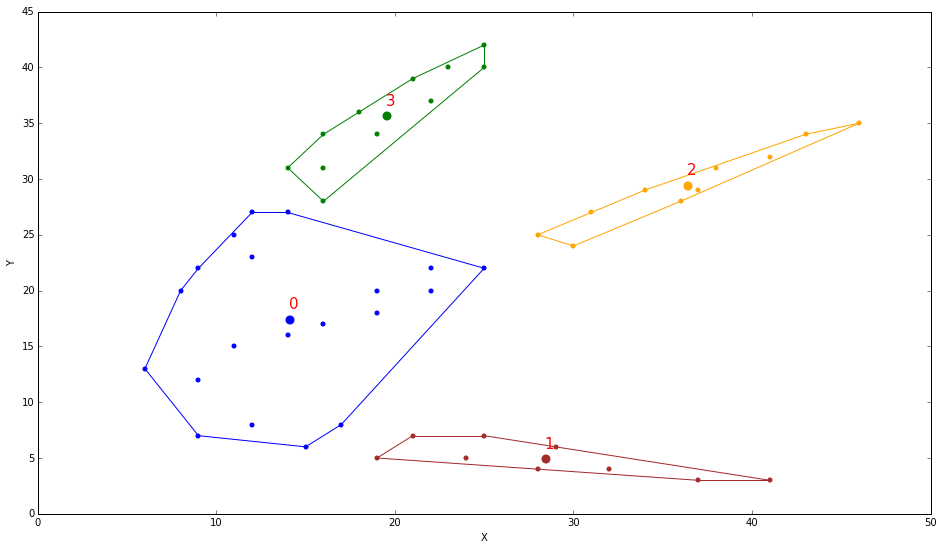

In [10]:
from collections import deque
from scipy.spatial import ConvexHull

colors = deque(['b', 'r', 'w', 'k', 'c', 'm', 'y', 'g', 'orange', 'brown'])
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
for k, cluster in model.clusters.items():
    # plot each point in each cluster in the scatter plot 
    x = [v[0] for v in cluster]
    y = [v[1] for v in cluster]
    ax.scatter(x, y, color=colors[0], s=16)
    
    # can only draw a hull if there are three or more points
    if len(cluster) >= 3:
        # draw the convex hull of each cluster
        hull = ConvexHull(cluster)
        for simplex in hull.simplices:
            plt.plot(np.array(cluster)[simplex, 0], np.array(cluster)[simplex, 1], 'k-', c=colors[0])
    
    # plot the means
    x = model.means[k][0]
    y = model.means[k][1]
    ax.scatter(x, y, color=colors[0], s=64)
    ax.text(x, y + 1, str(k), fontsize=15, color='r')
    colors.rotate()

#for i in range(len(model.means)):
    #

ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.plot()

In [11]:
predictions = model.predict(df[:6], ['x', 'y'])
print('Predictions: ', predictions)
print(model.means)
print(df[:1].as_matrix())
print('delta for first point: ', np.linalg.norm(df[:1].as_matrix() - predictions[0]))

Predictions:  [3, 3, 3, 3, 3, 3]
[array([ 14.1,  17.4]), array([ 28.44444444,   4.88888889]), array([ 36.4,  29.4]), array([ 19.54545455,  35.63636364])]
[[ 25.  42.]]
delta for first point:  44.7772263545


In [12]:
print(model.means)

[array([ 14.1,  17.4]), array([ 28.44444444,   4.88888889]), array([ 36.4,  29.4]), array([ 19.54545455,  35.63636364])]
